## AirBnb Price Prediction in Los Angeles
### CSP 571

#### Import Libraries

In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import umap.umap_ as umap

import folium
import warnings


In [57]:
# Ignore all warnings
warnings.filterwarnings("ignore")

# To view all the columns in the head 
pd.set_option('display.max_columns', None)

# Parse host_since
df = pd.read_csv('listings.csv', parse_dates=['host_since'])
df.head(30)

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,license,instant_bookable
0,670339032744709144,Westwood lovely three bedrooms three bathrooms,4780152,Moon,20/01/13,within a few hours,0.96,f,West Los Angeles,City of Los Angeles,34.049660,-118.435550,Entire condo,Entire home/apt,6,3.0,3.0,3.0,399.0,30,365,0,NaN,NaN,f
1,37014494,Spanish style lower duplex near Beverly Hills,278288178,Ida,22/07/19,NaN,NaN,f,Beverlywood,City of Los Angeles,34.048410,-118.387510,Entire rental unit,Entire home/apt,2,NaN,2.0,NaN,NaN,30,0,0,NaN,NaN,f
2,1024835174766068422,Charming Beverly Hills Home,513813179,Tiana,08/05/23,within a day,0.60,f,Beverly Hills,Other Cities,34.070583,-118.390742,Entire home,Entire home/apt,6,3.0,3.0,3.0,434.0,30,267,0,NaN,NaN,f
3,850744632375448560,Tianpu's warm room with bathroom,432956623,Dan,22/11/21,a few days or more,0.20,f,Temple City,Other Cities,34.109329,-118.073098,Private room in home,Private room,2,1.0,1.0,1.0,49.0,1,364,1,3.00,NaN,f
4,953950676345326970,"Santa Monica apt, free parking, steps to the b...",528669205,Farkhat,29/07/23,within an hour,1.00,t,Santa Monica,Other Cities,34.015590,-118.494080,Entire rental unit,Entire home/apt,2,1.0,0.0,1.0,231.0,5,193,44,4.93,Exempt,t
5,1082614257267236225,Practical Private Room #1398 A,557999481,Christos,22/01/24,within a day,1.00,f,North Hollywood,City of Los Angeles,34.173990,-118.361840,Private room in rental unit,Private room,1,0.0,4.0,1.0,62.0,30,278,0,NaN,NaN,f
6,5694422,2 Bedroom Modern Oasis,4151836,Sara,14/11/12,within a few hours,1.00,f,Del Rey,City of Los Angeles,33.990170,-118.422520,Entire home,Entire home/apt,7,1.0,2.0,5.0,110.0,30,117,368,4.61,HSR19-004352,f
7,873326033487284509,Luxury Waterfront Retreat | Rooftop View,510853557,Tig,19/04/23,within an hour,1.00,t,Venice,City of Los Angeles,33.982577,-118.464266,Entire home,Entire home/apt,6,3.5,4.0,4.0,1179.0,2,356,35,4.97,HSR23-000668,f
8,908697518167341476,"Modern, Resort-Style Home in West Hollywood",409985549,Bona Bona,29/06/21,within an hour,1.00,t,Beverly Grove,City of Los Angeles,34.088171,-118.365521,Entire home,Entire home/apt,8,4.5,4.0,4.0,1244.0,3,141,10,5.00,HSR24-001623,f
9,1158417037056953812,Lovely High Rise in Ktown,485962662,Max,01/11/22,a few days or more,0.30,f,Westlake,City of Los Angeles,34.053966,-118.265188,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,250.0,30,269,0,NaN,NaN,f


In [58]:
df.shape

(45533, 25)

In [59]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'license',
       'instant_bookable'],
      dtype='object')

In [60]:
df.describe()

,id,host_id,host_response_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating
count,4.553300e+04,4.553300e+04,35445.000000,45533.000000,45533.000000,45533.000000,37294.000000,42494.000000,37199.000000,37296.000000,45533.000000,45533.000000,45533.000000,33387.000000
mean,5.208941e+17,1.950473e+08,0.952010,34.055308,-118.312743,4.019876,1.649434,1.786817,2.255786,289.377762,17.858520,195.093449,36.658929,4.778747
std,4.976570e+17,1.899825e+08,0.168667,0.141394,0.172210,2.861610,1.218398,1.339151,1.811313,715.366985,28.836101,133.394403,80.548528,0.415048
min,1.090000e+02,5.210000e+02,0.000000,33.338360,-118.917134,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000
25%,3.319485e+07,2.632699e+07,1.000000,33.998590,-118.413090,2.000000,1.000000,1.000000,1.000000,98.000000,2.000000,75.000000,0.000000,4.730000
50%,6.363561e+17,1.165631e+08,1.000000,34.060625,-118.343391,3.000000,1.000000,1.000000,2.000000,155.000000,14.000000,202.000000,6.000000,4.900000
75%,1.006571e+18,3.712316e+08,1.000000,34.108160,-118.233737,6.000000,2.000000,2.000000,3.000000,260.000000,30.000000,335.000000,34.000000,5.000000
max,1.238217e+18,5.997497e+08,1.000000,34.811183,-117.653352,16.000000,50.000000,50.000000,50.000000,56425.000000,1124.000000,365.000000,3024.000000,5.000000


In [61]:
# Percentage of values that are missing
total_nan = df.isna().sum().sort_values(ascending=False)
percentage_nan = (total_nan / df.shape[0]) * 100
tabel = pd.concat([total_nan, percentage_nan], axis=1, keys=['Total NaN values', 'Percentage of NaN values']).head(60)
tabel

,Total NaN values,Percentage of NaN values
license,32730,71.881932
review_scores_rating,12146,26.675159
host_response_time,10088,22.155360
host_response_rate,10088,22.155360
beds,8334,18.303209
bathrooms,8239,18.094569
price,8237,18.090176
bedrooms,3039,6.674280
host_is_superhost,1252,2.749654
host_name,2,0.004392


In [62]:
# Dropped columns
# license - more missing value percentage, property_type - room_type and property_type are similar, host_response_rate - with host_response_time, host_response_rate doesn't make sense. 

drop_cols = ['license', 'property_type', 'host_response_rate']

airbnb = df.drop(drop_cols, axis=1)
airbnb.shape 

(45533, 22)

In [63]:
airbnb.isnull().sum()

id                                  0
name                                1
host_id                             0
host_name                           2
host_since                          2
host_response_time              10088
host_is_superhost                1252
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
room_type                           0
accommodates                        0
bathrooms                        8239
bedrooms                         3039
beds                             8334
price                            8237
minimum_nights                      0
availability_365                    0
number_of_reviews                   0
review_scores_rating            12146
instant_bookable                    0
dtype: int64

In [64]:
airbnb['name'].fillna(airbnb['name'].mode()[0], inplace=True)
airbnb['host_name'].fillna(airbnb['host_name'].mode()[0], inplace=True)
airbnb['host_since'].fillna(airbnb['host_since'].mode()[0], inplace=True)

In [65]:
airbnb.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
host_since                          0
host_response_time              10088
host_is_superhost                1252
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
room_type                           0
accommodates                        0
bathrooms                        8239
bedrooms                         3039
beds                             8334
price                            8237
minimum_nights                      0
availability_365                    0
number_of_reviews                   0
review_scores_rating            12146
instant_bookable                    0
dtype: int64

In [66]:
# Replace with most occurring response
airbnb['host_response_time'].fillna("within an hour", inplace=True)
airbnb['host_is_superhost'].fillna("f", inplace=True)

In [67]:
room_specifics = ['bathrooms', 'bedrooms', 'beds', 'price']
for i in room_specifics:
    airbnb[i].fillna(airbnb[i].median(), inplace=True)
airbnb['review_scores_rating'].fillna(airbnb['review_scores_rating'].mean(), inplace=True)

In [68]:
airbnb.isnull().sum()

id                              0
name                            0
host_id                         0
host_name                       0
host_since                      0
host_response_time              0
host_is_superhost               0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
price                           0
minimum_nights                  0
availability_365                0
number_of_reviews               0
review_scores_rating            0
instant_bookable                0
dtype: int64

In [69]:
airbnb.head()

,id,name,host_id,host_name,host_since,host_response_time,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable
0,670339032744709144,Westwood lovely three bedrooms three bathrooms,4780152,Moon,20/01/13,within a few hours,f,West Los Angeles,City of Los Angeles,34.049660,-118.435550,Entire home/apt,6,3.0,3.0,3.0,399.0,30,365,0,4.778747,f
1,37014494,Spanish style lower duplex near Beverly Hills,278288178,Ida,22/07/19,within an hour,f,Beverlywood,City of Los Angeles,34.048410,-118.387510,Entire home/apt,2,1.0,2.0,2.0,155.0,30,0,0,4.778747,f
2,1024835174766068422,Charming Beverly Hills Home,513813179,Tiana,08/05/23,within a day,f,Beverly Hills,Other Cities,34.070583,-118.390742,Entire home/apt,6,3.0,3.0,3.0,434.0,30,267,0,4.778747,f
3,850744632375448560,Tianpu's warm room with bathroom,432956623,Dan,22/11/21,a few days or more,f,Temple City,Other Cities,34.109329,-118.073098,Private room,2,1.0,1.0,1.0,49.0,1,364,1,3.000000,f
4,953950676345326970,"Santa Monica apt, free parking, steps to the b...",528669205,Farkhat,29/07/23,within an hour,t,Santa Monica,Other Cities,34.015590,-118.494080,Entire home/apt,2,1.0,0.0,1.0,231.0,5,193,44,4.930000,t


In [70]:
airbnb.dtypes

id                                int64
name                             object
host_id                           int64
host_name                        object
host_since                       object
host_response_time               object
host_is_superhost                object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
price                           float64
minimum_nights                    int64
availability_365                  int64
number_of_reviews                 int64
review_scores_rating            float64
instant_bookable                 object
dtype: object

#### Feature Engineering

In [71]:
# To encode the categorical variables
label_encoder = LabelEncoder()
airbnb['neighbourhood_group_cleansed'] = label_encoder.fit_transform(airbnb['neighbourhood_group_cleansed'])

In [72]:
# One-hot Encoding
airbnb = pd.get_dummies(airbnb, columns=['room_type'])

#### Dealing with High Cardinal attributes

In [73]:
airbnb_num = airbnb.drop(['name', 'host_name', 'host_since', 'host_response_time', 'host_is_superhost', 'neighbourhood_cleansed', 'instant_bookable'], axis=1)
airbnb_num.corr()['price'].sort_values(ascending=False)

price                           1.000000
bathrooms                       0.469224
bedrooms                        0.359241
accommodates                    0.329072
beds                            0.285609
room_type_Entire home/apt       0.120410
availability_365                0.078511
id                              0.026750
room_type_Hotel room            0.022917
review_scores_rating            0.017829
latitude                        0.003150
host_id                        -0.003965
minimum_nights                 -0.013174
neighbourhood_group_cleansed   -0.014825
room_type_Shared room          -0.036191
number_of_reviews              -0.050652
room_type_Private room         -0.117589
longitude                      -0.138273
Name: price, dtype: float64

#### Data visualization

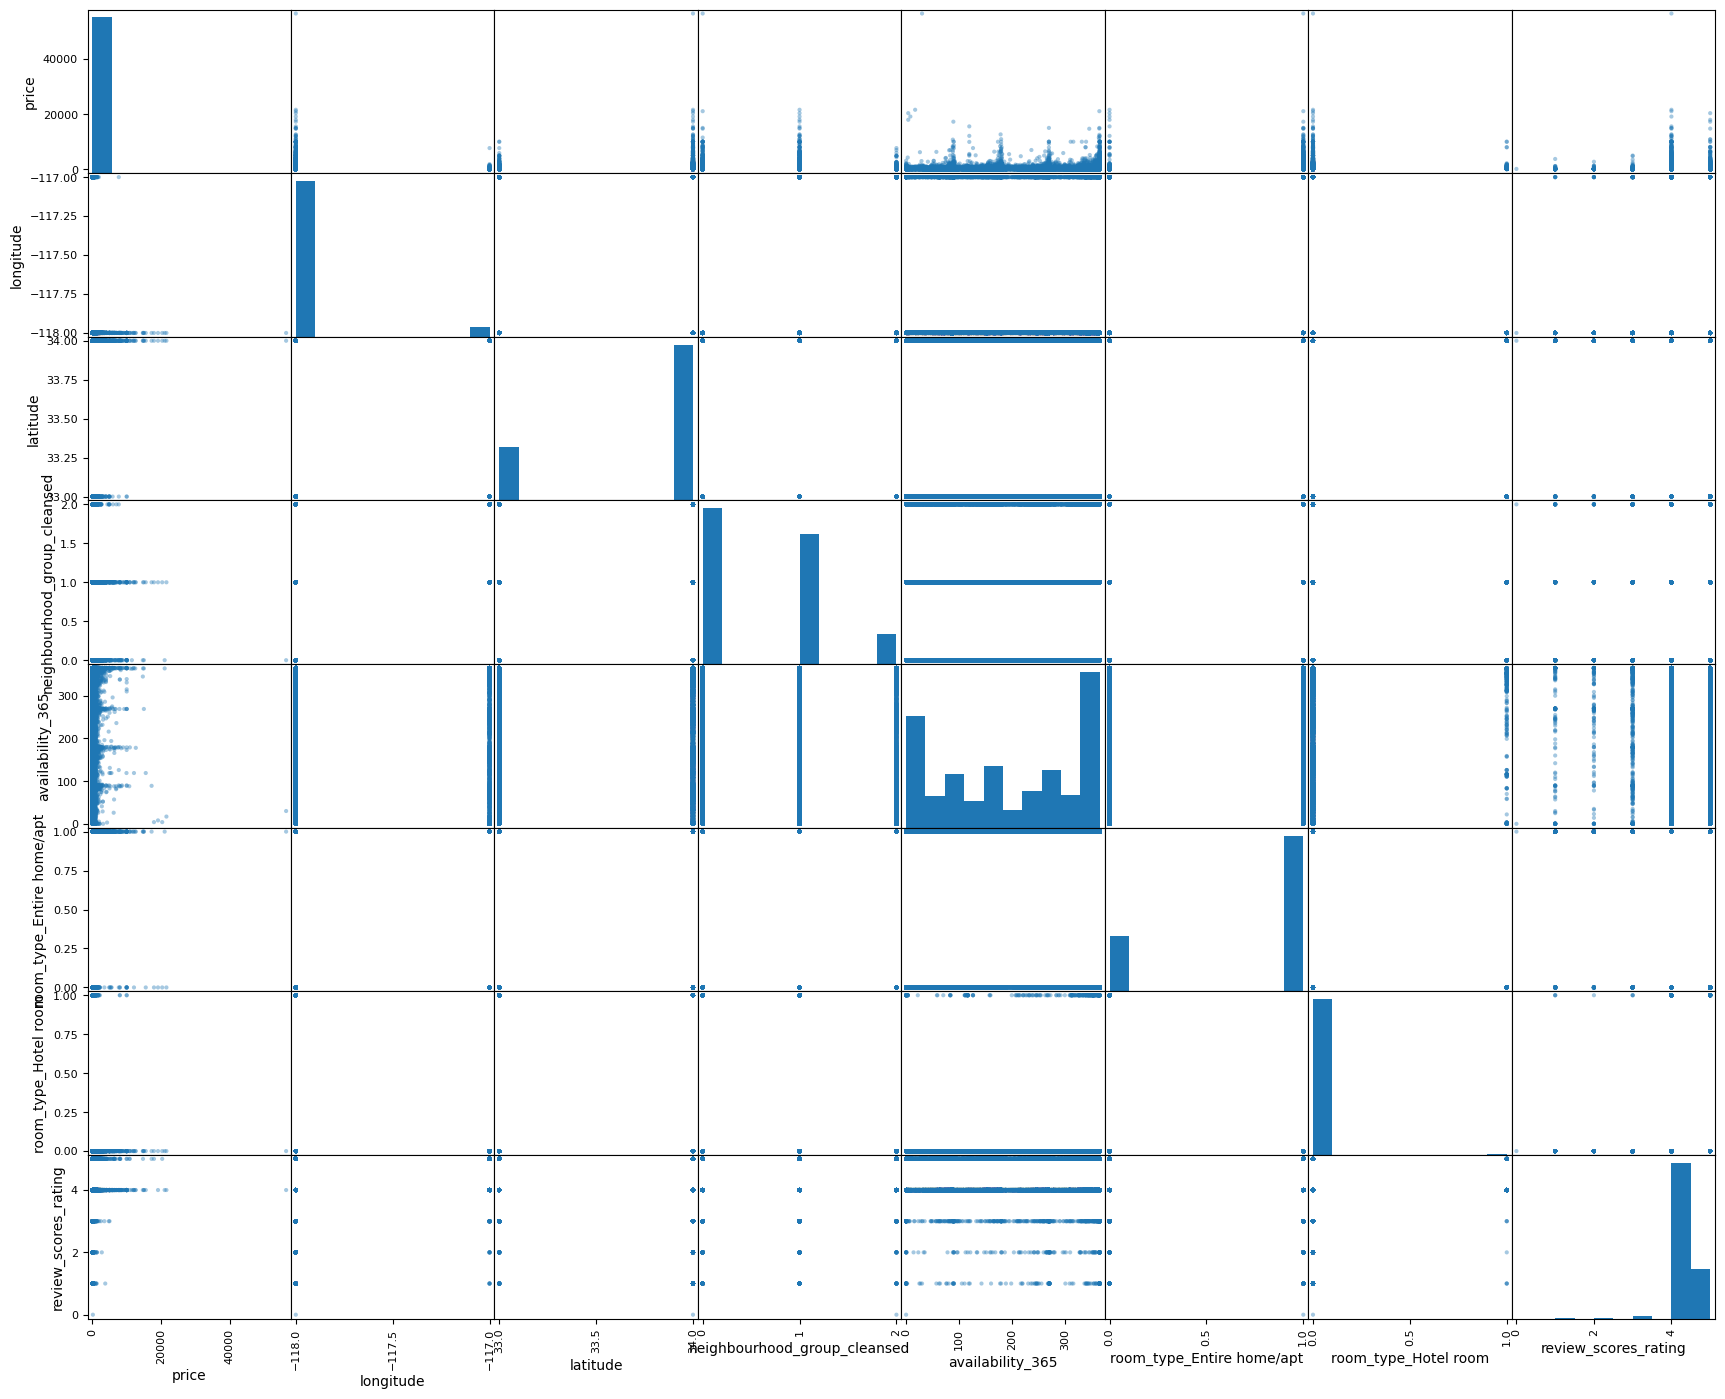

In [74]:
# With External Factors

cols = ['price','longitude', 'latitude', 'neighbourhood_group_cleansed',
        'availability_365', 'room_type_Entire home/apt', 'room_type_Hotel room', 'review_scores_rating']

airbnb_num[cols] = airbnb[cols].astype(int)

scatter_matrix(airbnb_num[cols], alpha=0.4, figsize=(21,17))
plt.savefig(r"figure1.png")
plt.show()

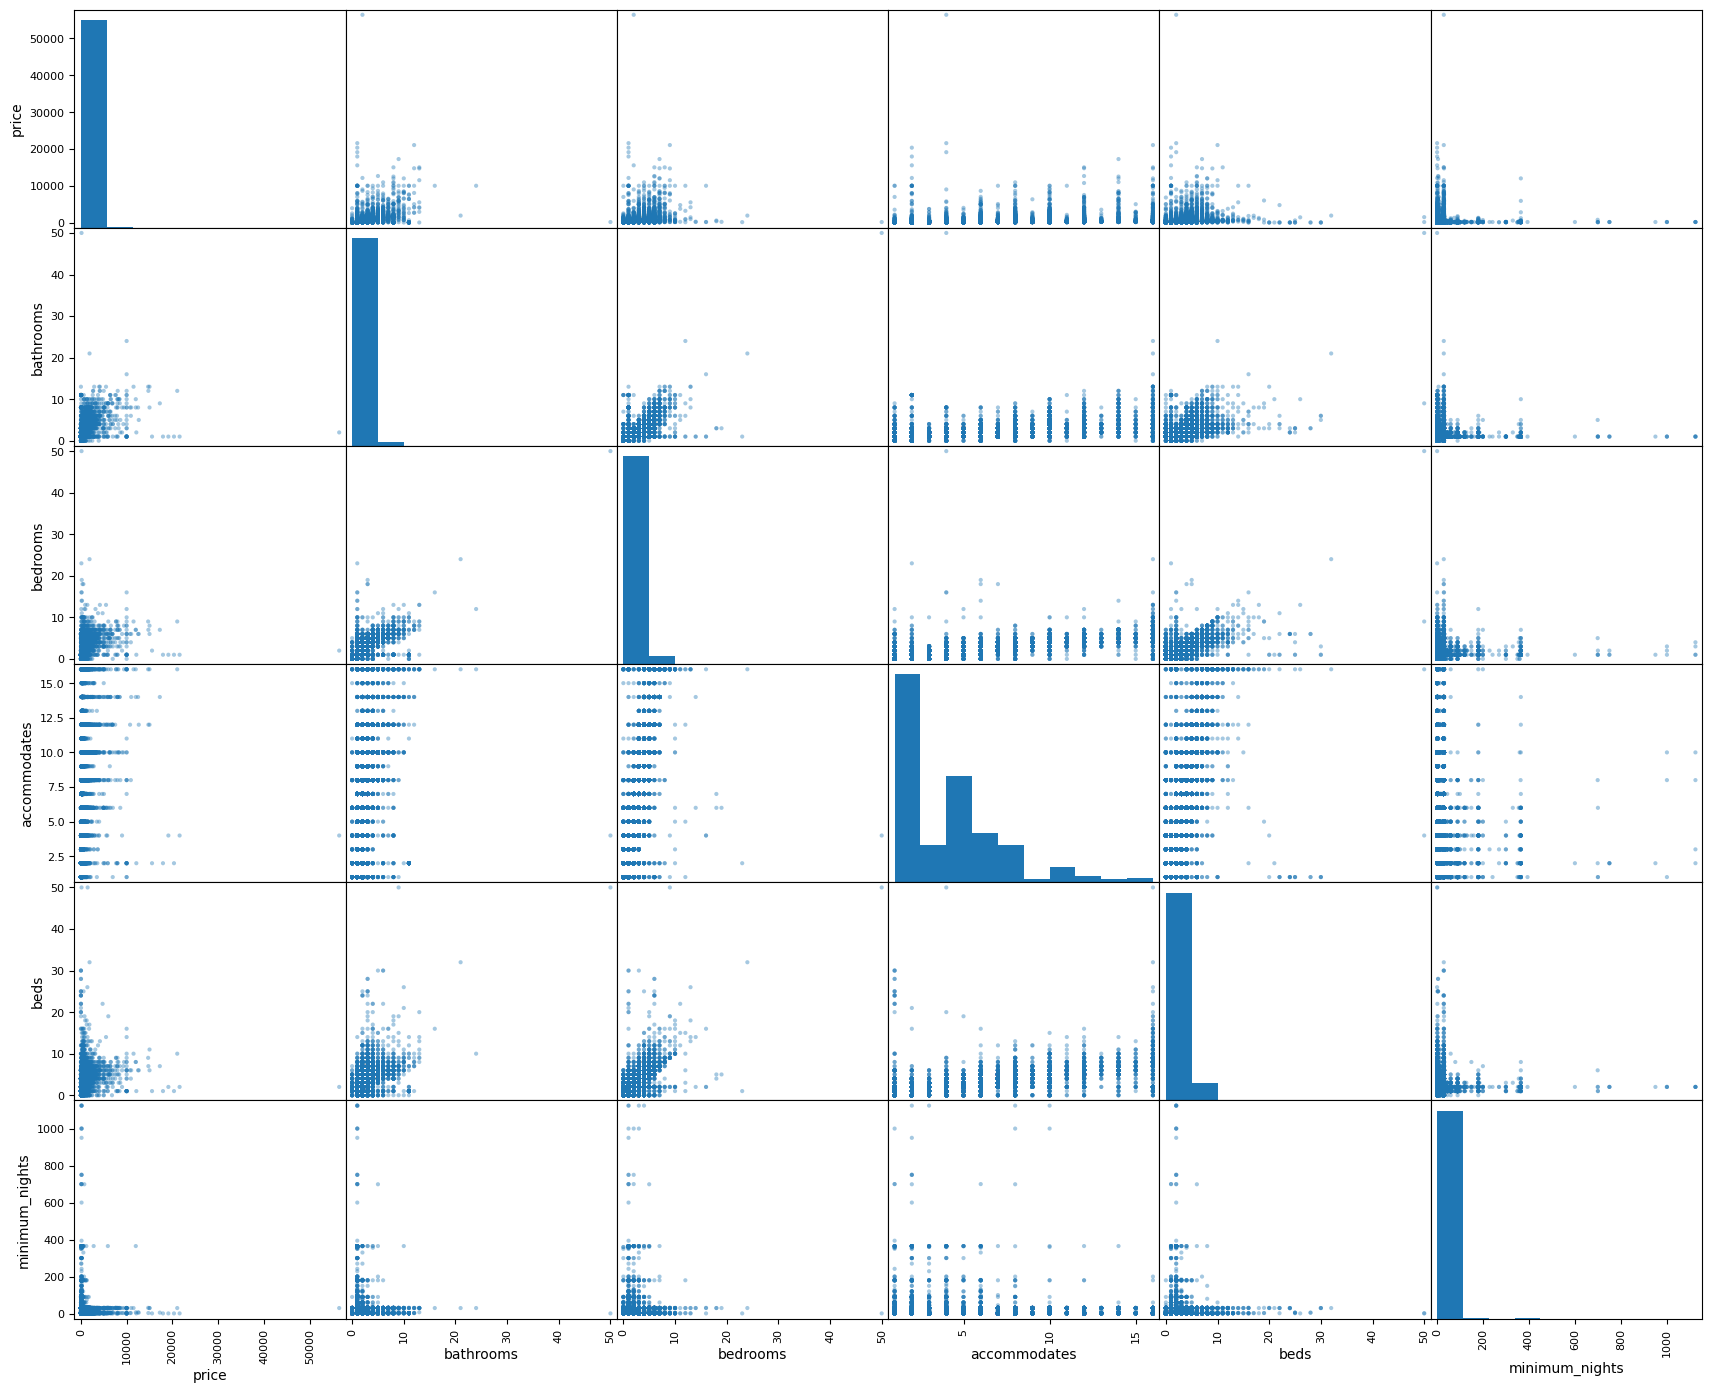

In [75]:
# With Internal Factors
cols = ['price','bathrooms', 'bedrooms', 'accommodates',
        'beds', 'minimum_nights']

airbnb_num[cols] = airbnb[cols].astype(int)

scatter_matrix(airbnb_num[cols], alpha=0.4, figsize=(21,17))
plt.savefig(r"figure2.png")
plt.show()

#### Outliers / Skewness

In [76]:
# Finding skewness
cols = ['longitude', 'latitude','price', 'bathrooms','bedrooms', 'beds', 'accommodates']
def finding_skewness():
    for col in cols:
        print(f'{col} has a skewness of {airbnb_num[col].skew(skipna = True)}')

finding_skewness()

longitude has a skewness of 3.7733992171218453
latitude has a skewness of -1.127954620637051
price has a skewness of 24.80783757519389
bathrooms has a skewness of 5.771111428594008
bedrooms has a skewness of 3.0589788147298687
beds has a skewness of 4.2852843084019625
accommodates has a skewness of 1.5693129240909103


#### Price as our target variable with a skewness of 24.8 it could be a huge problem

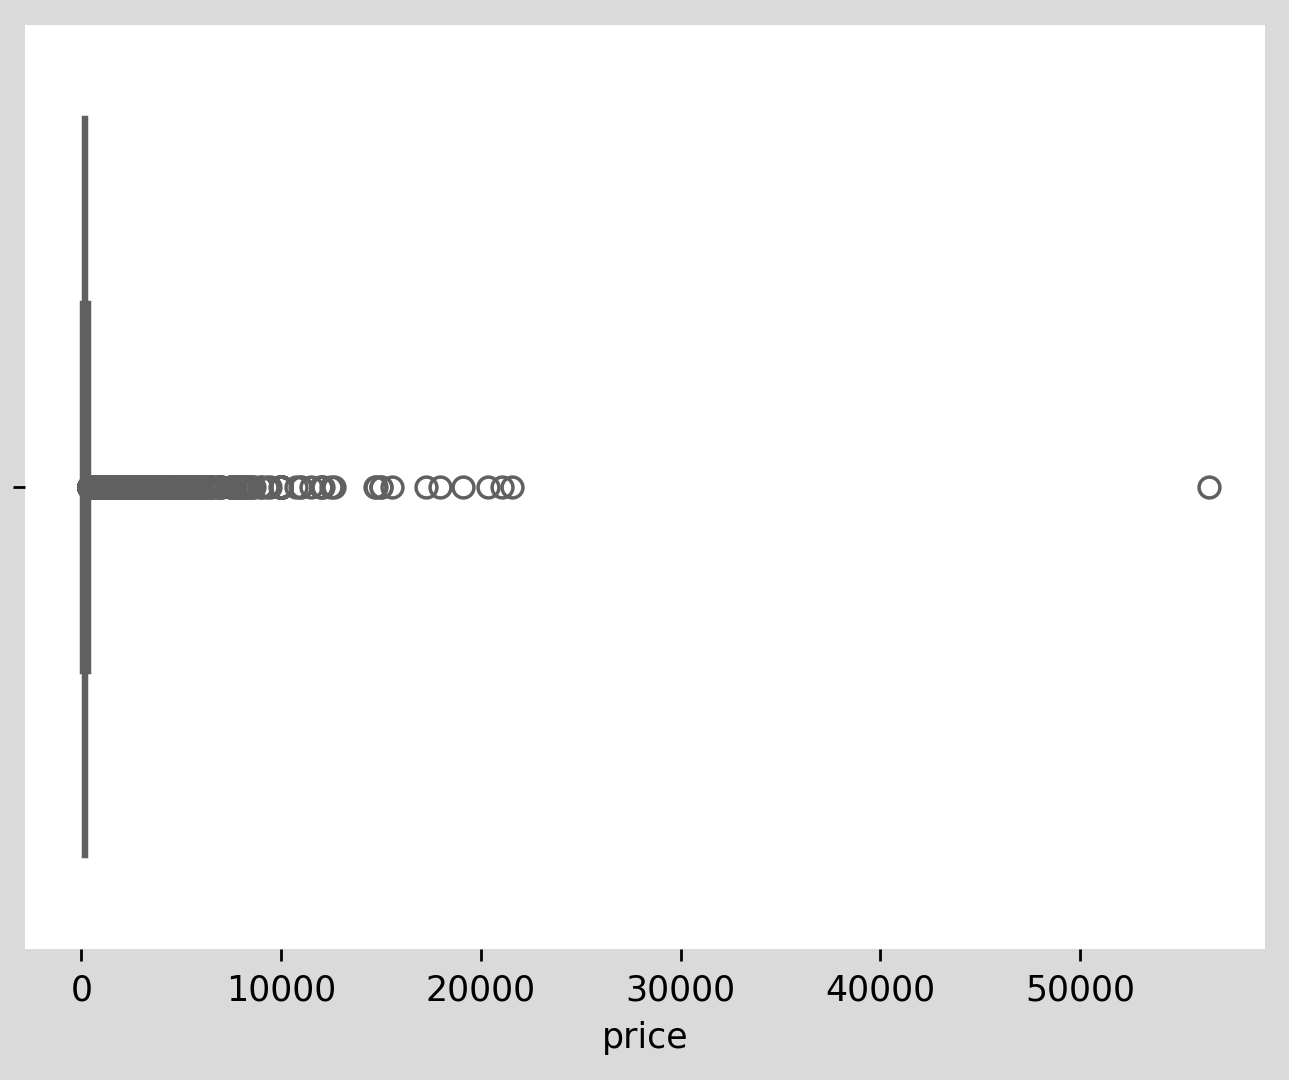

In [77]:
# Fixing outliers in price col
plt.figure(dpi=250, facecolor = '#dadada')

sns.boxplot(x='price', data=airbnb, palette='Blues')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.savefig(r"box2.png")

plt.show()

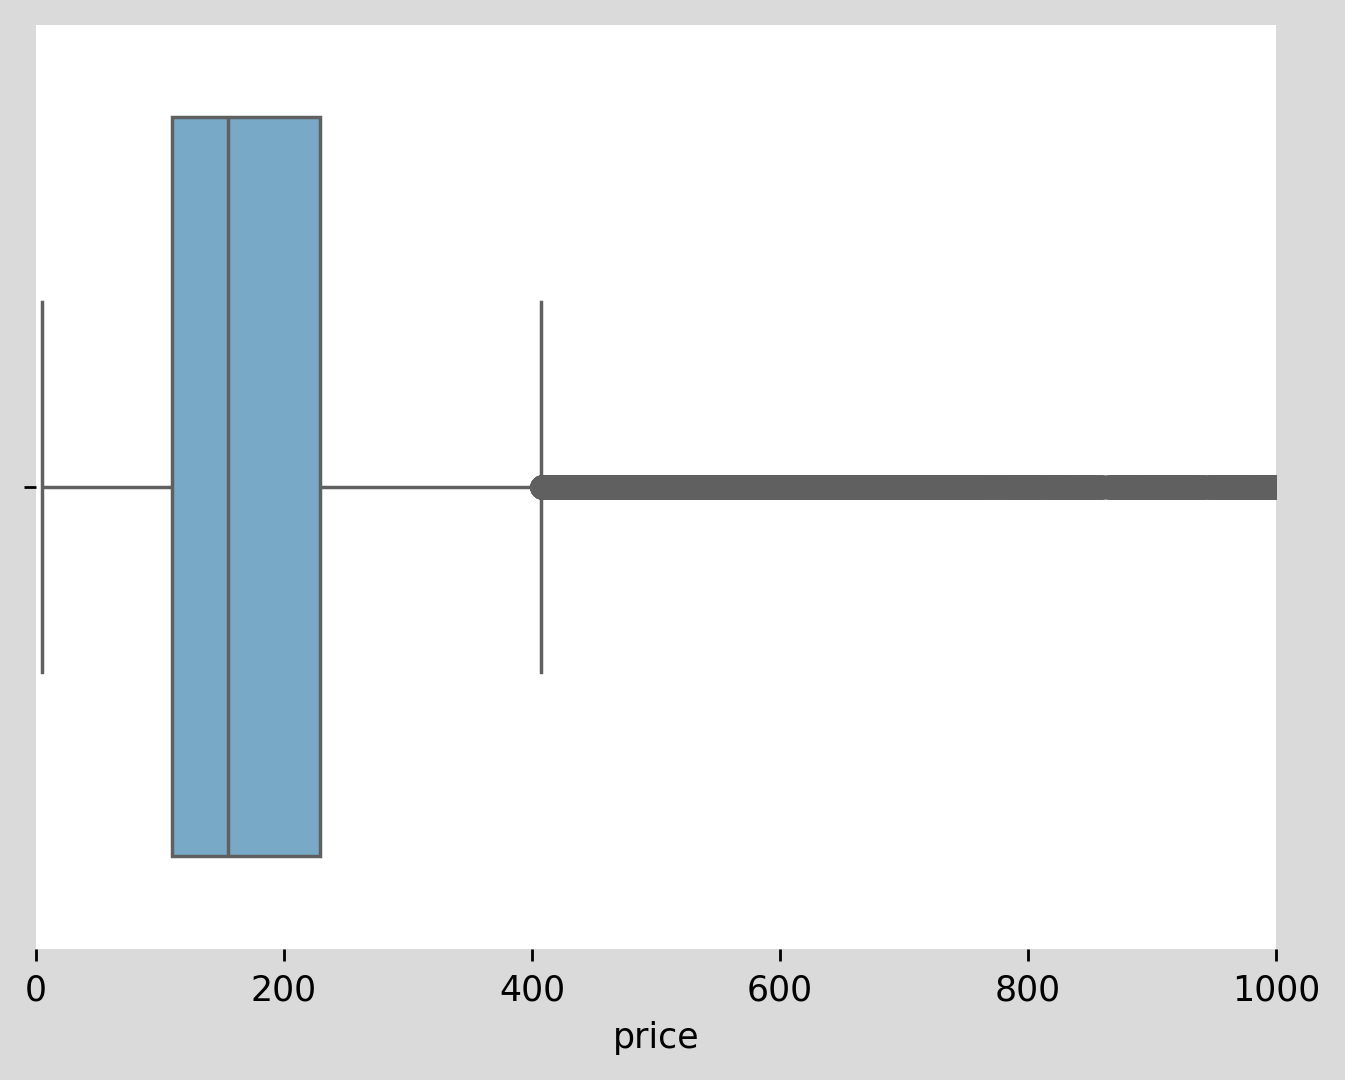

In [78]:
plt.figure(dpi=250, facecolor = '#dadada')
sns.boxplot(x='price', data=airbnb, palette='Blues')
plt.xlim(0,1000)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.savefig(r"box1.png")

plt.show()

#### Looking at the box plot interquartile range of airbnb nightly price is between 75 to 175, and about 110 is the mean.

In [79]:
# To get rid of the outliers and to bring down the skewness we will only use price below 1000 and above 24
airbnb = airbnb.loc[(airbnb.price < 1000) & (airbnb.price > 24)]
airbnb.price.skew()

np.float64(2.5264517656510956)

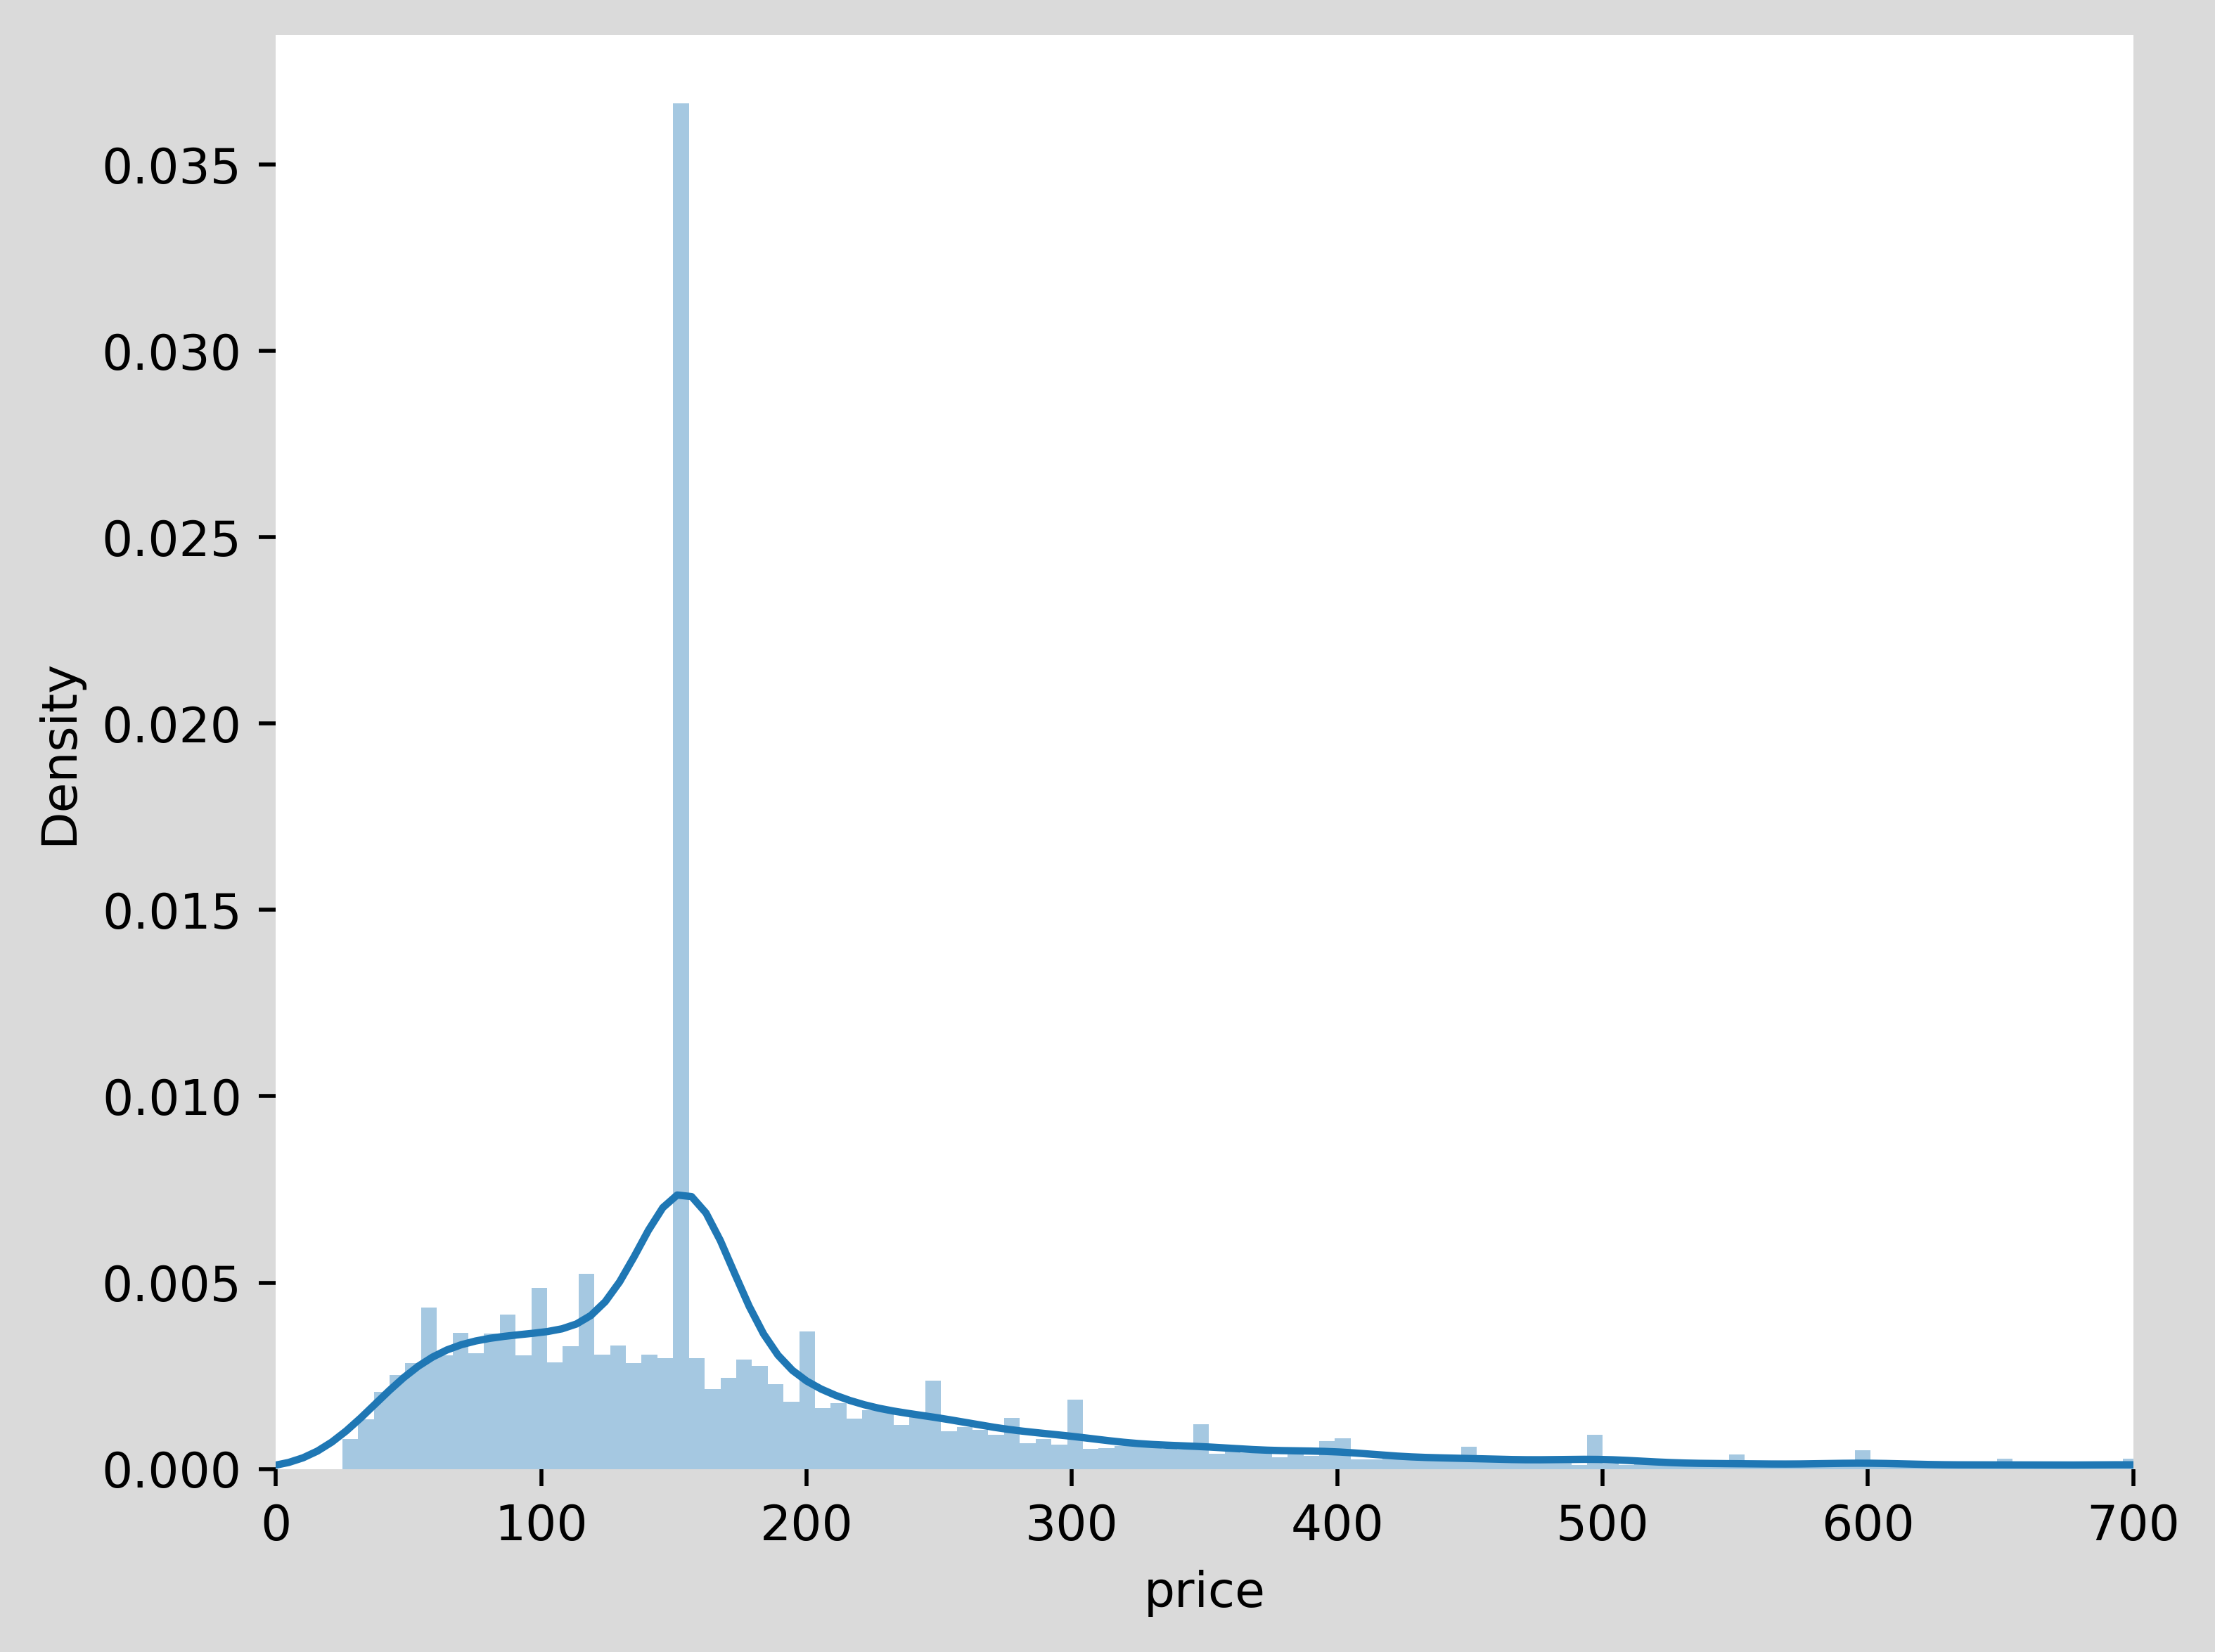

In [80]:
def plotting_to_check_skewness():
    for col in ['price']:
        
        plt.figure(dpi=500, facecolor = '#dadada')
        plt.xlim(0, 700)

        sns.distplot(airbnb[col], kde=True, bins='auto')

        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["bottom"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.gca().spines["left"].set_visible(False)

        plt.tight_layout()
        plt.savefig('skew.png',bbox_inches='tight', dpi=500, facecolor = '#dadada')

        plt.show()

plotting_to_check_skewness()

#### Neighborhood Analysis 

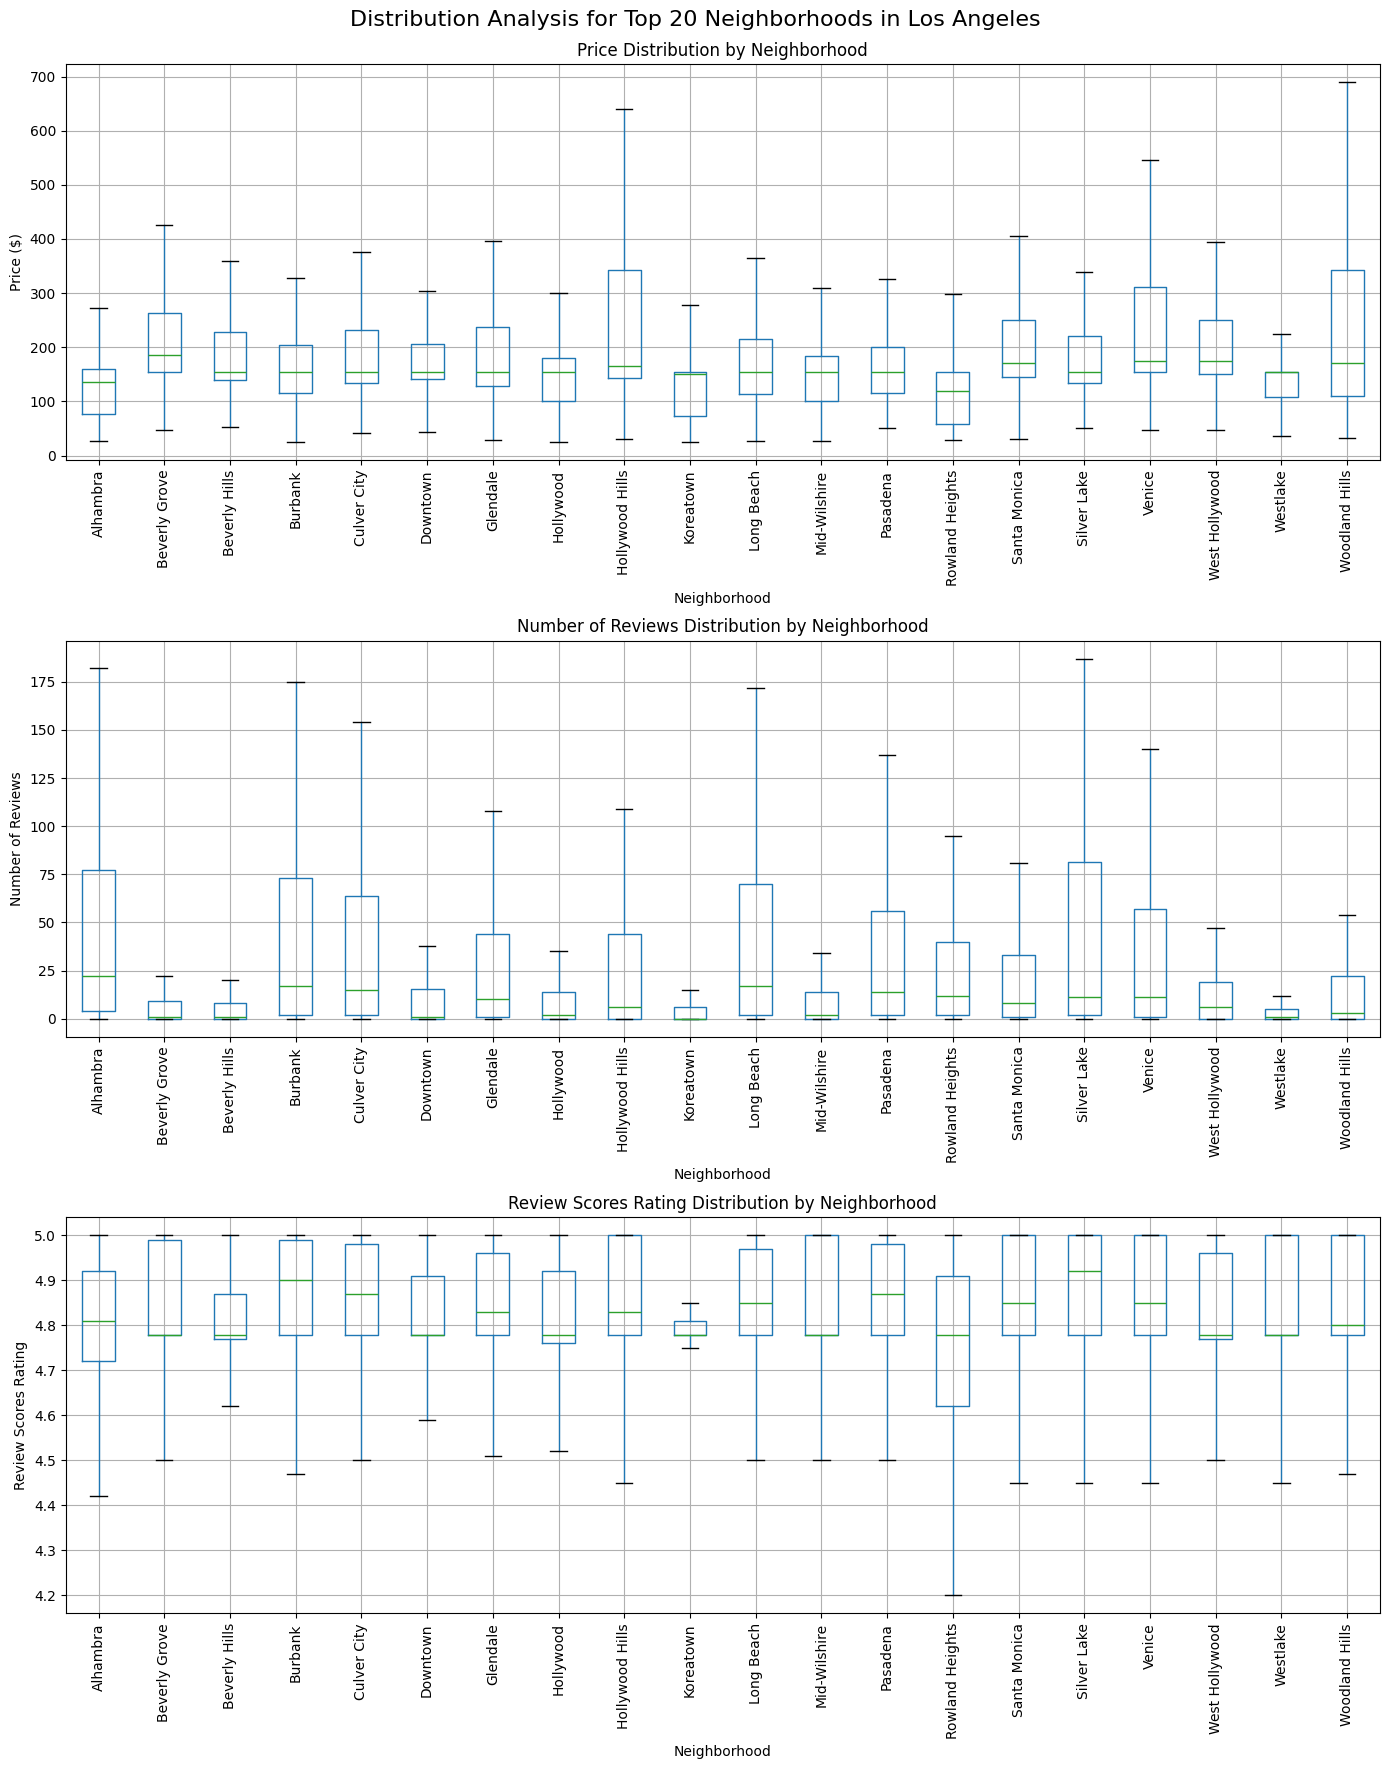

In [81]:
# Top 20 neighborhoods by number of listings
top_neighborhoods = airbnb['neighbourhood_cleansed'].value_counts().head(20).index

# Filter the data for only those top neighborhoods
top_neighborhoods_data = airbnb[airbnb['neighbourhood_cleansed'].isin(top_neighborhoods)]

fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Boxplot for price distribution in the top 20 neighborhoods
top_neighborhoods_data.boxplot(column='price', by='neighbourhood_cleansed', ax=axes[0], showfliers=False)
axes[0].set_title('Price Distribution by Neighborhood')
axes[0].set_ylabel('Price ($)')
axes[0].set_xlabel('Neighborhood')
axes[0].tick_params(axis='x', rotation=90)

# Boxplot for number of reviews distribution in the top 20 neighborhoods
top_neighborhoods_data.boxplot(column='number_of_reviews', by='neighbourhood_cleansed', ax=axes[1], showfliers=False)
axes[1].set_title('Number of Reviews Distribution by Neighborhood')
axes[1].set_ylabel('Number of Reviews')
axes[1].set_xlabel('Neighborhood')
axes[1].tick_params(axis='x', rotation=90)

# Boxplot for review scores rating distribution in the top 20 neighborhoods
top_neighborhoods_data.boxplot(column='review_scores_rating', by='neighbourhood_cleansed', ax=axes[2], showfliers=False)
axes[2].set_title('Review Scores Rating Distribution by Neighborhood')
axes[2].set_ylabel('Review Scores Rating')
axes[2].set_xlabel('Neighborhood')
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Distribution Analysis for Top 20 Neighborhoods in Los Angeles', size=16)

plt.show()

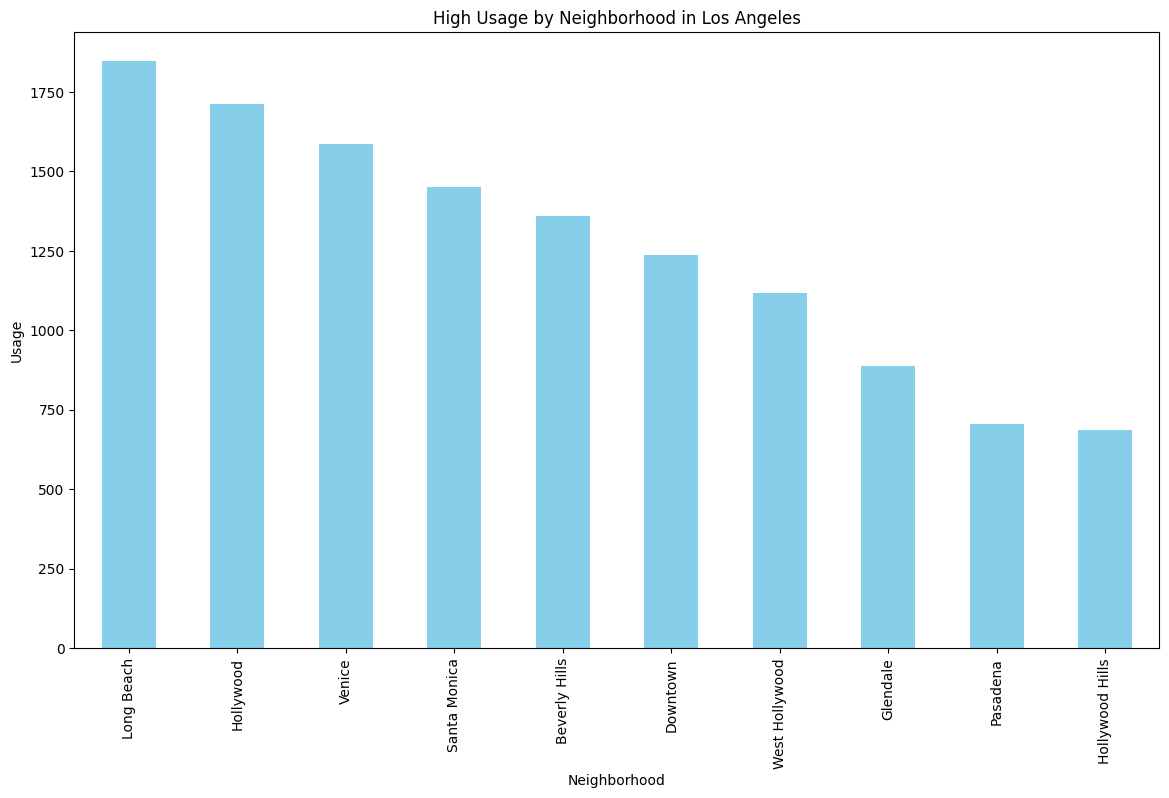

In [82]:
# Grouping the data by neighborhood and calculating the usage
neighborhood_prices = airbnb.groupby('neighbourhood_cleansed')['id'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
neighborhood_prices.plot(kind='bar', color='skyblue')
plt.title('High Usage by Neighborhood in Los Angeles')
plt.xlabel('Neighborhood')
plt.ylabel('Usage')
plt.xticks(rotation=90)
plt.show()

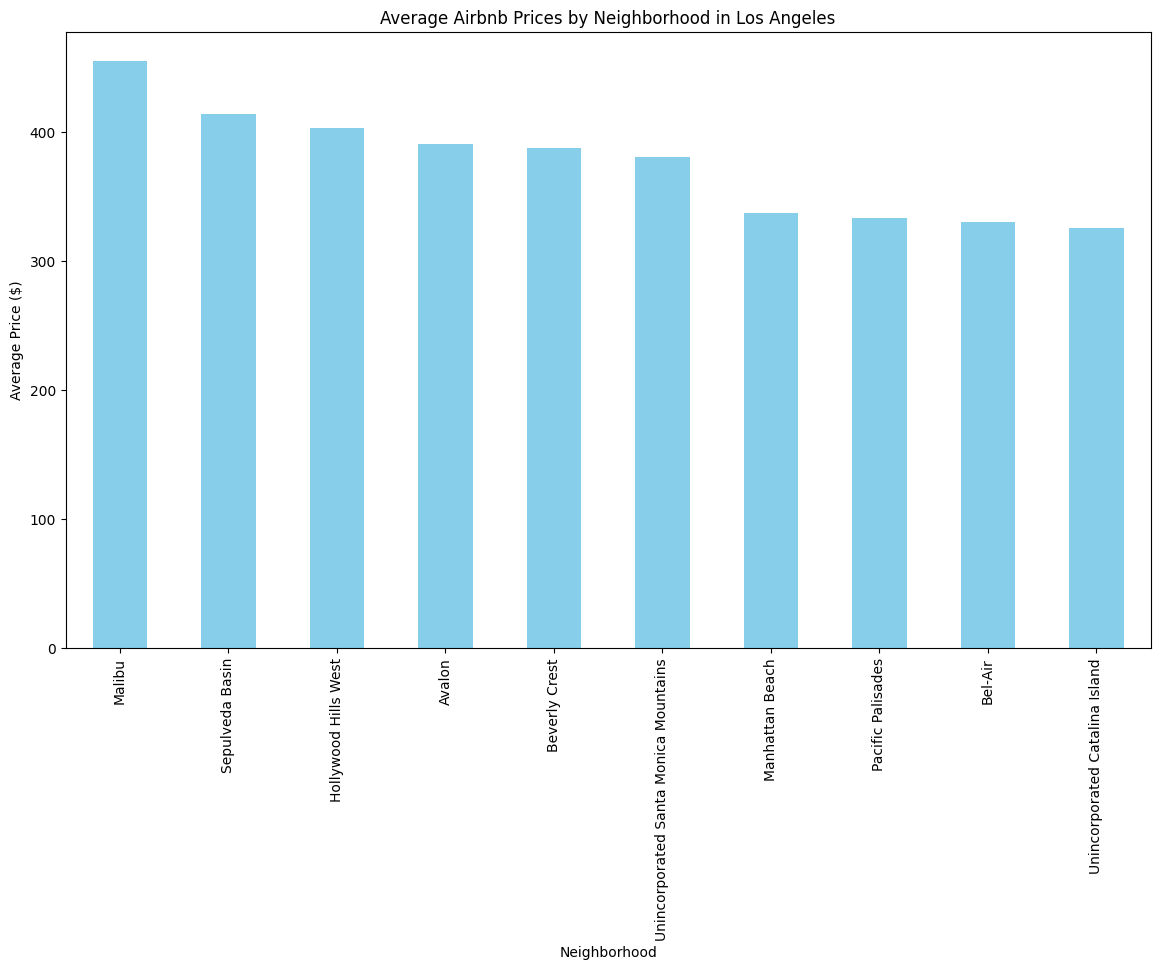

In [83]:
# Average Airbnb Prices in LA
neighborhood_prices = airbnb.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
neighborhood_prices.plot(kind='bar', color='skyblue')
plt.title('Average Airbnb Prices by Neighborhood in Los Angeles')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()

In [84]:
# Count of listings for each neighborhood
count_data = airbnb.groupby('neighbourhood_cleansed').agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'id': 'count'
}).rename(columns={'id': 'count'})

# Create a new map centered around Los Angeles
count_map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Add circles to the map based on the count of listings
for index, row in count_data.iterrows():
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=row['count'],  # Scale radius to make counts visible, adjust as necessary
        color='green',
        fill=True,
        fill_opacity=0.7,
        tooltip=f"{index}: {row['count']} listings"
    ).add_to(count_map)

count_map

In [85]:
# Step 1: Data Preprocessing and Exploration
# Impute missing numeric values with mean
numeric_features = airbnb_num.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
airbnb_num[numeric_features] = imputer.fit_transform(airbnb_num[numeric_features])

In [86]:
# Standardizing numeric features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(airbnb_num[numeric_features])

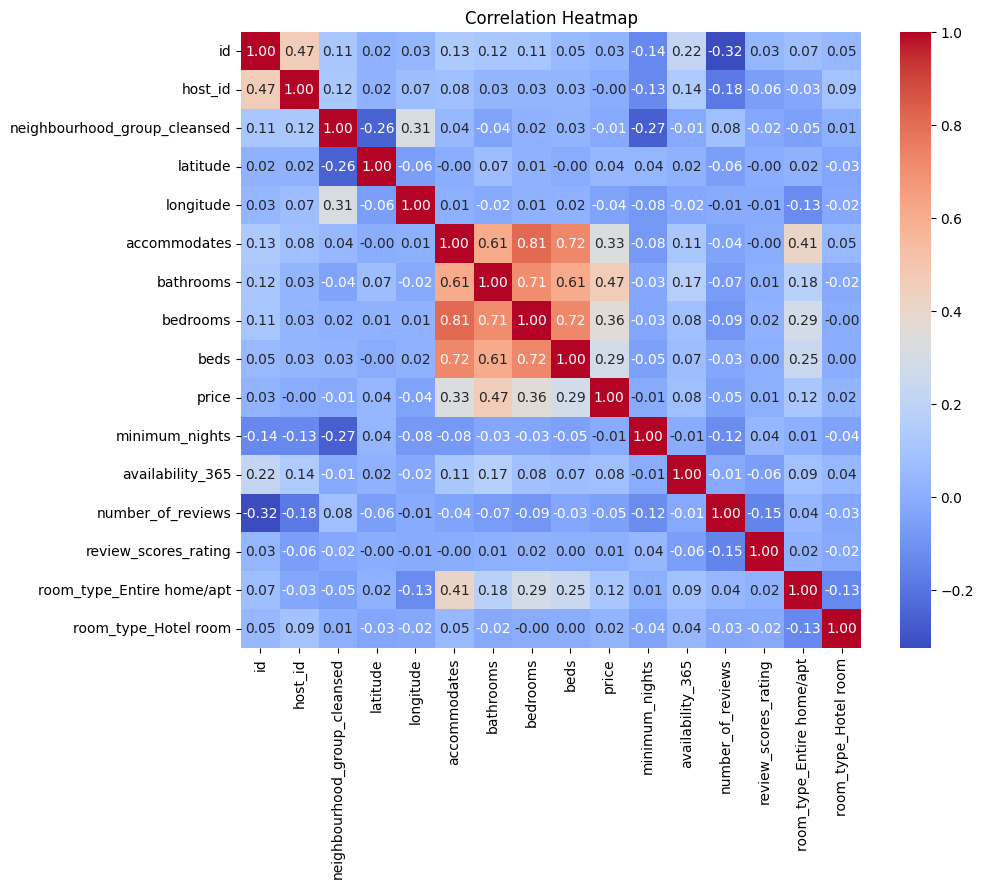

In [87]:
# Generate correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(airbnb_num[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

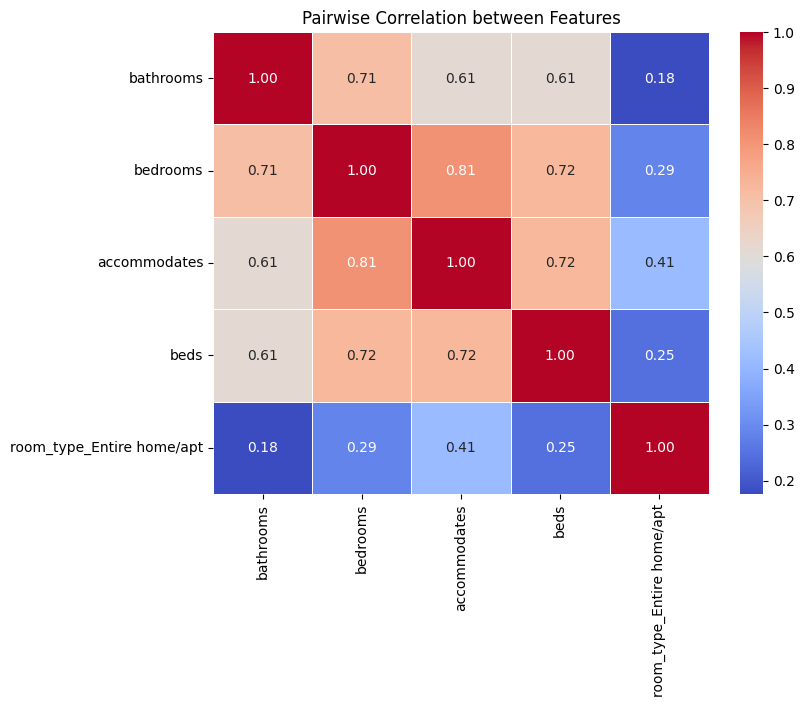

In [88]:
pairwise_corr = airbnb_num[["bathrooms", "bedrooms", "accommodates", "beds", "room_type_Entire home/apt"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(pairwise_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Pairwise Correlation between Features")
plt.show()

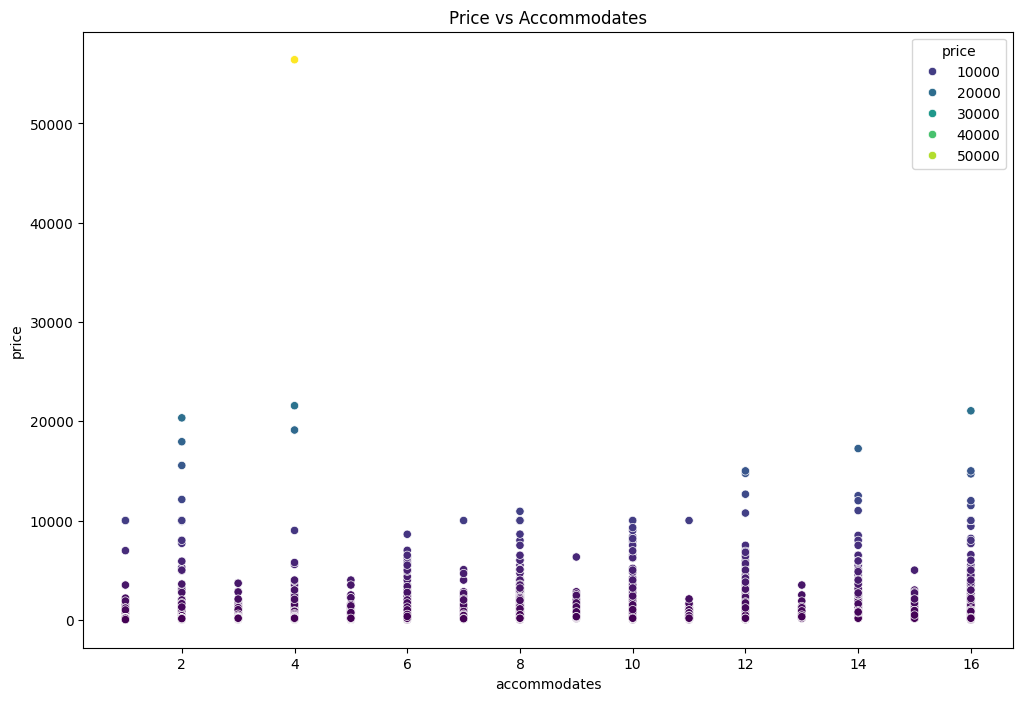

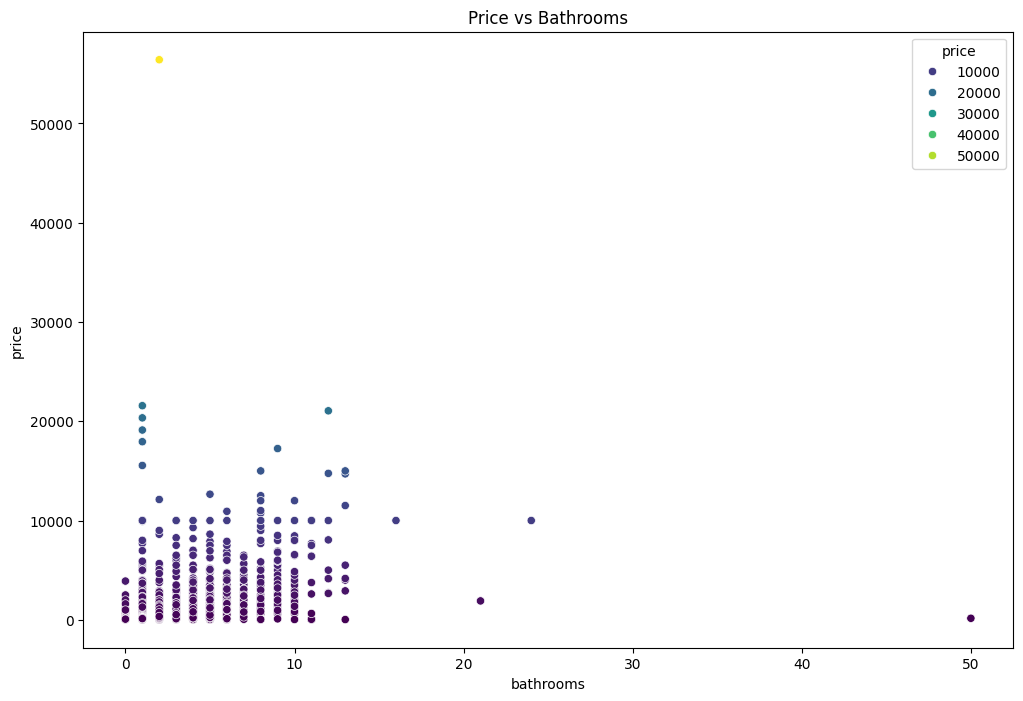

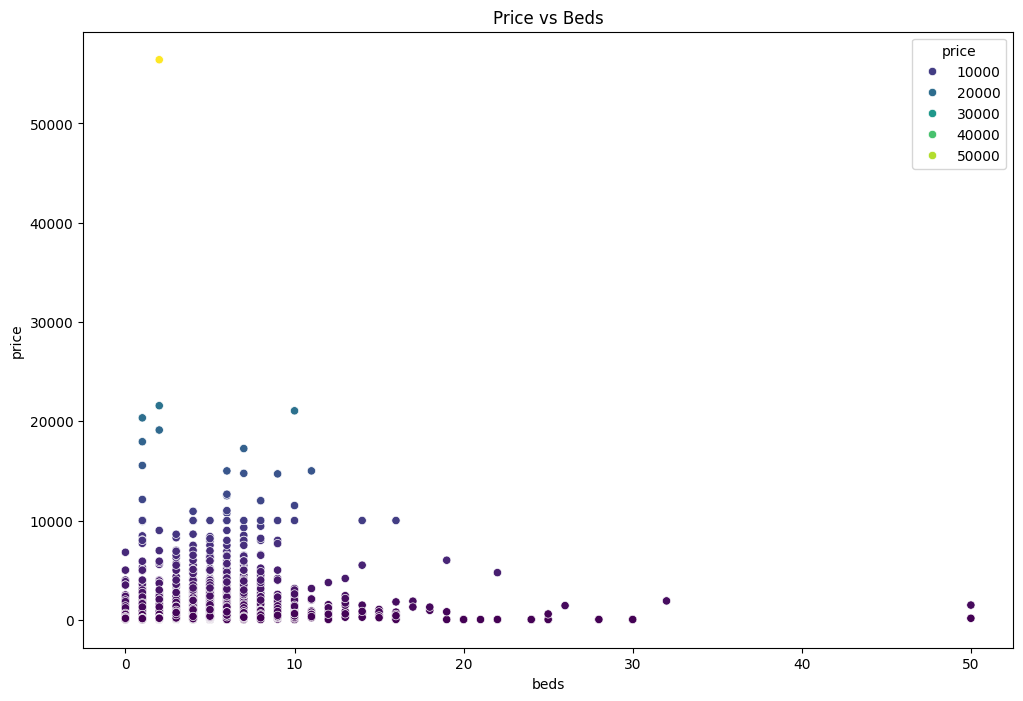

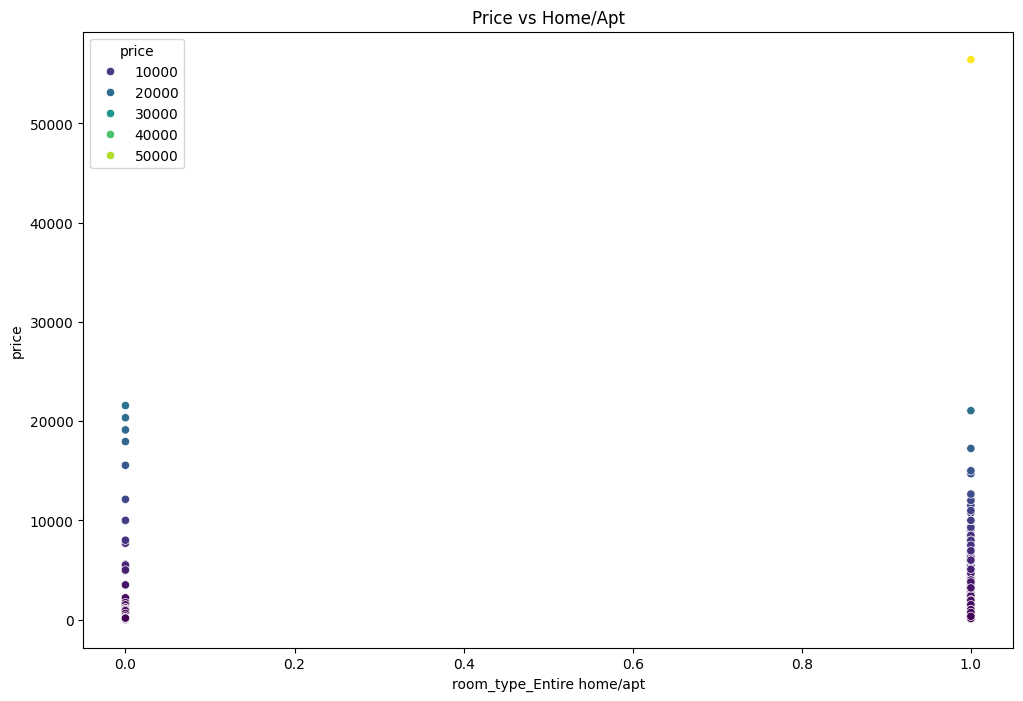

In [89]:
# Impact of features on the target variable (price)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='accommodates', y='price', data=airbnb_num, hue='price', palette='viridis')
plt.title("Price vs Accommodates")
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='bathrooms', y='price', data=airbnb_num, hue='price', palette='viridis')
plt.title("Price vs Bathrooms")
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='beds', y='price', data=airbnb_num, hue='price', palette='viridis')
plt.title("Price vs Beds")
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='room_type_Entire home/apt', y='price', data=airbnb_num, hue='price', palette='viridis')
plt.title("Price vs Home/Apt")
plt.show()

In [90]:
# Step 2: Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
airbnb_num['PCA1'] = pca_result[:, 0]
airbnb_num['PCA2'] = pca_result[:, 1]

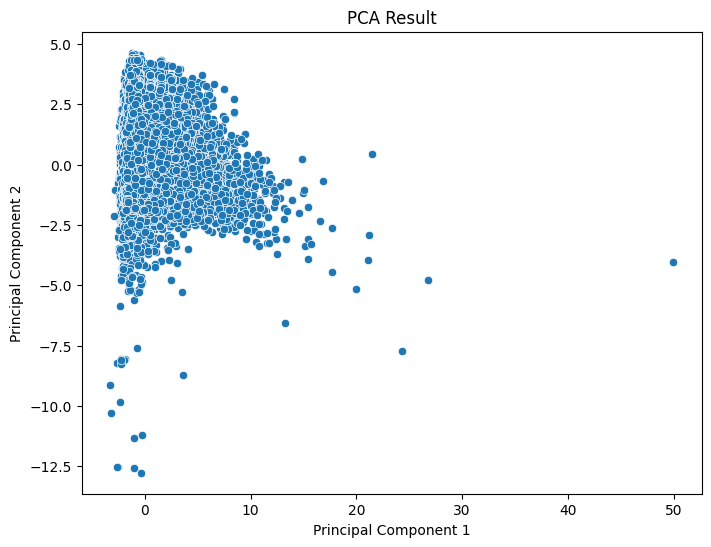

In [91]:
# Plot PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=airbnb_num)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [92]:
print("Explained variance by PCA components:", pca.explained_variance_ratio_)

Explained variance by PCA components: [0.22033515 0.11288697]


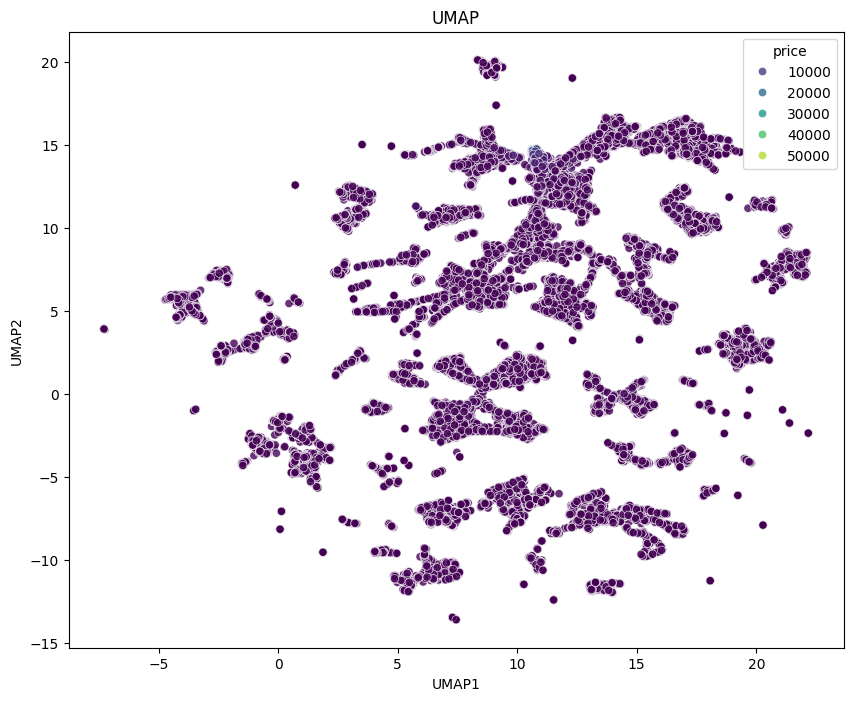

In [93]:
# UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = reducer.fit_transform(data_scaled)

umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
umap_df['price'] = airbnb_num['price'].values

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='price', data=umap_df, palette='viridis', alpha=0.8)
plt.title('UMAP')
plt.show()

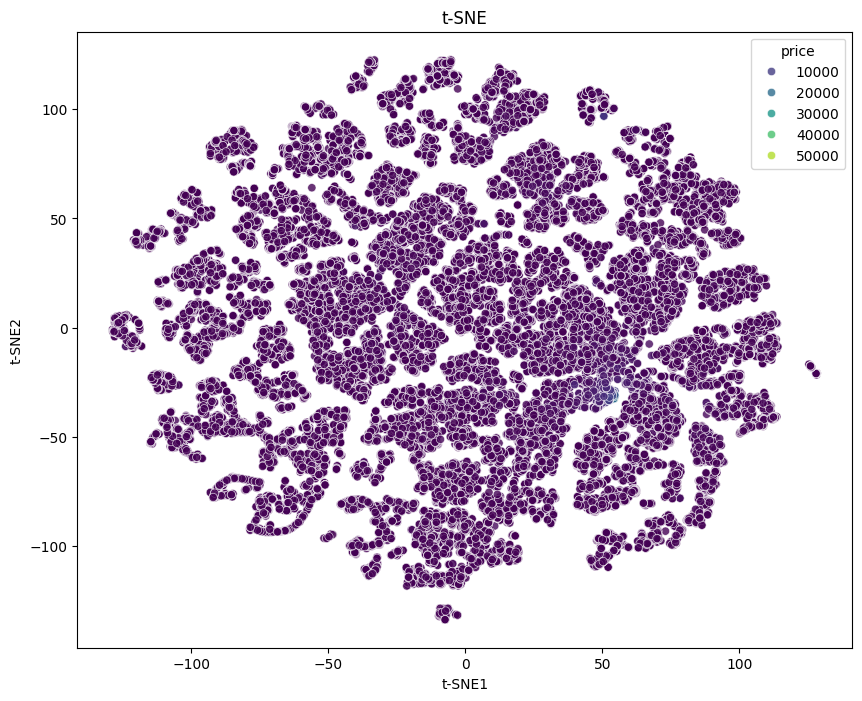

In [94]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(data_scaled)

tsne_df = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])
tsne_df['price'] = airbnb_num['price'].values

plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='price', data=tsne_df, palette='viridis', alpha=0.8)
plt.title('t-SNE')
plt.show()

In [95]:
# Step 3: Unsupervised Learning (Clustering)
kmeans = KMeans(n_clusters=3, random_state=42)
airbnb_num['Cluster'] = kmeans.fit_predict(data_scaled)

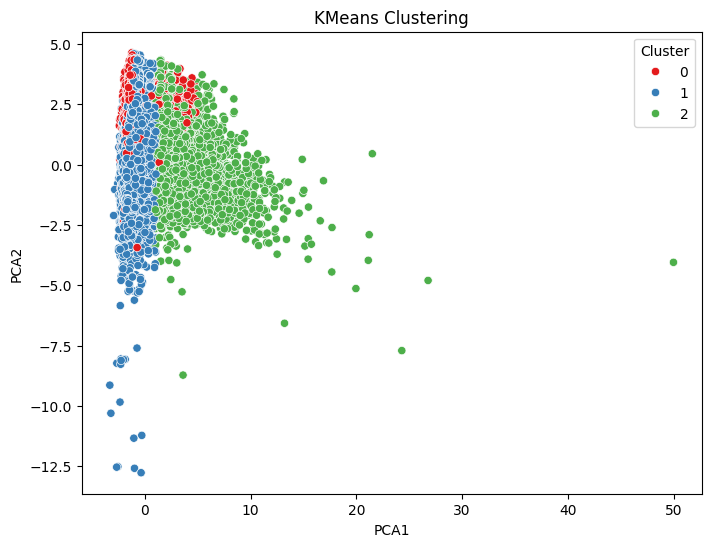

In [96]:
# Visualize clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=airbnb_num, palette='Set1')
plt.title('KMeans Clustering')
plt.show()

In [97]:
# Step 4: Modeling and Validation
# Define target variable and features for supervised learning
# Assume 'price' is the target variable (adjust as per actual target column)
target = 'price'
features = airbnb.drop(columns=[target] + ['id', 'name', 'host_id', 'host_name'])  # Exclude non-relevant columns
X = features.select_dtypes(include=['float64', 'int64'])
y = airbnb[target]

In [98]:
# Binarize target for classification (e.g., price above/below median)
median_price = np.median(y)
y_binary = (y > median_price).astype(int)

In [99]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

In [100]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [101]:
#Evaluate on test set
y_test_pred = model.predict(X_test)
print("Test Set Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Test Set Performance:
Confusion Matrix:
 [[7310  736]
 [1936 3179]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      8046
           1       0.81      0.62      0.70      5115

    accuracy                           0.80     13161
   macro avg       0.80      0.77      0.77     13161
weighted avg       0.80      0.80      0.79     13161



In [102]:
# Define hyperparameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}

# Perform Grid Search with Cross-Validation on the training set
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate best model on the test set
best_model = grid_search.best_estimator_
y_test_pred_tuned = best_model.predict(X_test)
print("\nTuned Model Performance on Test Set:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_tuned))

Best Hyperparameters: {'C': 10, 'solver': 'liblinear'}

Tuned Model Performance on Test Set:
Confusion Matrix:
 [[7303  743]
 [1929 3186]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      8046
           1       0.81      0.62      0.70      5115

    accuracy                           0.80     13161
   macro avg       0.80      0.77      0.77     13161
weighted avg       0.80      0.80      0.79     13161



In [103]:
# Cross-validation score
cv_scores = cross_val_score(model, X, y_binary, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV score:", np.mean(cv_scores))

Cross-validation scores: [0.78607249 0.79211306 0.81650331 0.79883747 0.7762708 ]
Average CV score: 0.7939594255755641


Performance Improvement

In [104]:
# Step 5: Performance Improvement
# Experiment 1: Feature Selection Using Recursive Feature Elimination (RFE)
# Perform RFE

# Use XGBoost for RFE
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
rfe_xgb = RFE(xgb_model, n_features_to_select=10)
X_train_rfe_xgb = rfe_xgb.fit_transform(X_train, y_train)
X_test_rfe_xgb = rfe_xgb.transform(X_test)

# Evaluate with cross-validation
cv_scores_rfe_xgb = cross_val_score(xgb_model, X_train_rfe_xgb, y_train, cv=5, scoring="accuracy")
print("CV Scores with RFE (XGBoost):", cv_scores_rfe_xgb)
print("Average CV Score with RFE (XGBoost):", cv_scores_rfe_xgb.mean())

# Train and evaluate on the test set
xgb_model.fit(X_train_rfe_xgb, y_train)
y_test_pred_rfe_xgb = xgb_model.predict(X_test_rfe_xgb)
print("\nTest Set Performance with RFE-selected Features (XGBoost):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rfe_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rfe_xgb))


CV Scores with RFE (XGBoost): [0.87479648 0.8738196  0.87333116 0.8798437  0.87200782]
Average CV Score with RFE (XGBoost): 0.8747597527781282

Test Set Performance with RFE-selected Features (XGBoost):
Confusion Matrix:
 [[7302  744]
 [ 938 4177]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      8046
           1       0.85      0.82      0.83      5115

    accuracy                           0.87     13161
   macro avg       0.87      0.86      0.86     13161
weighted avg       0.87      0.87      0.87     13161



Experiment 1 (RFE):

* Focuses on simplifying the model by retaining only the most relevant features.
* Should improve interpretability and potentially reduce overfitting.


In [105]:
# Experiment 2: Increasing Model Complexity Using Random Forest
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate with cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="accuracy")
print("CV Scores with Random Forest:", cv_scores_rf)
print("Average CV Score with Random Forest:", cv_scores_rf.mean())

# Evaluate on the test set
y_test_pred_rf = rf_model.predict(X_test)
print("\nTest Set Performance with Random Forest:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rf))

CV Scores with Random Forest: [0.87561055 0.88261153 0.87870401 0.8762618  0.88047549]
Average CV Score with Random Forest: 0.8787326758545291

Test Set Performance with Random Forest:
Confusion Matrix:
 [[7358  688]
 [ 920 4195]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      8046
           1       0.86      0.82      0.84      5115

    accuracy                           0.88     13161
   macro avg       0.87      0.87      0.87     13161
weighted avg       0.88      0.88      0.88     13161



Experiment 2 (Random Forest):

* Tests whether a more complex and flexible model captures additional patterns in the data.
* Should improve performance if the relationships between features and target are non-linear.

In [106]:
# Experiment 3: Stacking Classifier

# Define base models
base_models = [
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
]

# Define Stacking Classifier
stack_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(max_iter=1000), cv=5)
stack_model.fit(X_train, y_train)

# Cross-validation
cv_scores_stack = cross_val_score(stack_model, X_train, y_train, cv=5, scoring="accuracy")
print("CV Scores with Stacking Classifier:", cv_scores_stack)
print("Average CV Score with Stacking Classifier:", cv_scores_stack.mean())

# Test set evaluation
y_test_pred_stack = stack_model.predict(X_test)
print("\nTest Set Performance with Stacking Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_stack))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_stack))

CV Scores with Stacking Classifier: [0.87886682 0.88309997 0.88082058 0.87935526 0.87900993]
Average CV Score with Stacking Classifier: 0.8802305115575784

Test Set Performance with Stacking Classifier:
Confusion Matrix:
 [[7341  705]
 [ 908 4207]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      8046
           1       0.86      0.82      0.84      5115

    accuracy                           0.88     13161
   macro avg       0.87      0.87      0.87     13161
weighted avg       0.88      0.88      0.88     13161



In [107]:

# Summary and insights
print("Final Findings:")
print("1. PCA reduced the dimensionality significantly, capturing most of the variance in the dataset.")
print("2. Clustering added informative groupings, potentially improving model interpretability.")
print("3. Logistic regression showed reasonable performance, but further tuning (e.g., hyperparameters or alternative models) could enhance results.")

'''# Ensure dataset alignment before exporting
common_indices = airbnb_num.index.intersection(y.index)
aligned_airbnb_num = airbnb_num.loc[common_indices]

# Export the final preprocessed dataset for review
export_path = '/mnt/data/final_processed_dataset.csv'
aligned_airbnb_num.to_csv(export_path, index=False)

# Provide the final preprocessed dataset to the user
import ace_tools as tools
tools.display_dataframe_to_user(name="Final Processed Dataset for Project", dataframe=aligned_airbnb_num)

export_path = "/your/desired/path/final_processed_dataset.csv"
aligned_airbnb_num.to_csv(export_path, index=False)

print(f"Dataset saved as '{export_path}'.") '''


Final Findings:
1. PCA reduced the dimensionality significantly, capturing most of the variance in the dataset.
2. Clustering added informative groupings, potentially improving model interpretability.
3. Logistic regression showed reasonable performance, but further tuning (e.g., hyperparameters or alternative models) could enhance results.


'# Ensure dataset alignment before exporting\ncommon_indices = airbnb_num.index.intersection(y.index)\naligned_airbnb_num = airbnb_num.loc[common_indices]\n\n# Export the final preprocessed dataset for review\nexport_path = \'/mnt/data/final_processed_dataset.csv\'\naligned_airbnb_num.to_csv(export_path, index=False)\n\n# Provide the final preprocessed dataset to the user\nimport ace_tools as tools\ntools.display_dataframe_to_user(name="Final Processed Dataset for Project", dataframe=aligned_airbnb_num)\n\nexport_path = "/your/desired/path/final_processed_dataset.csv"\naligned_airbnb_num.to_csv(export_path, index=False)\n\nprint(f"Dataset saved as \'{export_path}\'.") '